Model je oblika y_hat = Theta0 + Theta1 * x
y_hat =  [0.14219055] + [[0.3225882]] *x


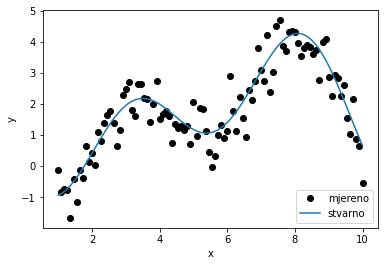

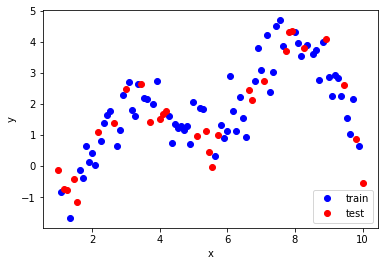

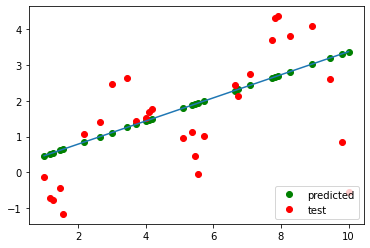

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error

def non_func(x):
 y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
 return y

def add_noise(y):
 np.random.seed(14)
 varNoise = np.max(y) - np.min(y)
 y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
 return y_noisy

x = np.linspace(1,10,100)
y_true = non_func(x)
y_measured = add_noise(y_true)

plt.figure(1)
plt.plot(x,y_measured,'ok',label='mjereno')
plt.plot(x,y_true,label='stvarno')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 4)
np.random.seed(12)
indeksi = np.random.permutation(len(x))
indeksi_train = indeksi[0:int(np.floor(0.7*len(x)))]
indeksi_test = indeksi[int(np.floor(0.7*len(x)))+1:len(x)]
x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]
xtrain = x[indeksi_train]
ytrain = y_measured[indeksi_train]
xtest = x[indeksi_test]
ytest = y_measured[indeksi_test]
plt.figure(2)
plt.plot(xtrain,ytrain,'ob',label='train')
plt.plot(xtest,ytest,'or',label='test')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 4)
linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)
print('Model je oblika y_hat = Theta0 + Theta1 * x')
print('y_hat = ', linearModel.intercept_, '+', linearModel.coef_, '*x')
ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)
plt.figure(3)
plt.plot(xtest,ytest_p,'og',label='predicted')
plt.plot(xtest,ytest,'or',label='test')
plt.legend(loc = 4)
x_pravac = np.array([1,10])
x_pravac = x_pravac[:, np.newaxis]
y_pravac = linearModel.predict(x_pravac)
plt.plot(x_pravac, y_pravac)

In [22]:
jedinice = np.ones(len(xtrain))
jedinice = jedinice[:,np.newaxis]
x2 = np.hstack((jedinice,xtrain))
transpondirana = np.transpose(x2)
inverz = np.linalg.inv(np.dot(transpondirana,x2))
theta = np.dot(np.dot(inverz,transpondirana),ytrain)
print ('Model je oblika y_hat = Theta0 + Theta1 * x')
print ('y_hat = ', theta[0], '+', theta[1], '*x')

Model je oblika y_hat = Theta0 + Theta1 * x
y_hat =  [0.14219055] + [0.3225882] *x


Model je oblika y_hat = Theta0 + Theta1 * x
y_hat =  [0.14086987] + [0.32278489] *x


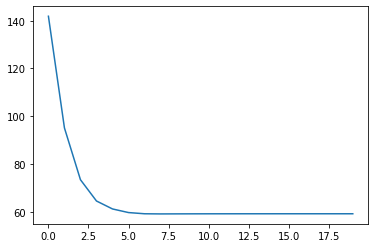

In [31]:
n = len(xtrain)
alpha = 0.01
theta = [0,0]
kriterijska=[]
for i in range(0,2500):
    sum1 = 0
    sum2 = 0
    udaljenost = 0
    for j in range (0, n):
        sum1 = sum1 + ((theta[0] + theta[1] * xtrain[j]) - ytrain[j]) * xtrain[j] / n
        sum2 = sum2 + ((theta[0] + theta[1] * xtrain[j]) - ytrain[j]) / n
        udaljenost = udaljenost + abs(ytrain[j] - theta[0] - theta[1] * xtrain[j])
    kriterijska.append(udaljenost)
    theta[0] = theta[0] - alpha * sum2;    
    theta[1] = theta[1] - alpha * sum1;

        
plt.figure(4)
plt.plot(kriterijska[:20])
print ('Model je oblika y_hat = Theta0 + Theta1 * x')
print ('y_hat = ', theta[0], '+', theta[1], '*x')

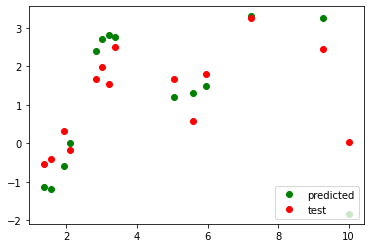

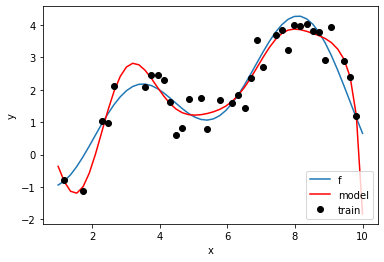

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
def non_func(x):
 y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
 return y
def add_noise(y):
 np.random.seed(14)
 varNoise = np.max(y) - np.min(y)
 y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
 return y_noisy

x = np.linspace(1,10,50)
y_true = non_func(x)
y_measured = add_noise(y_true)
x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]
# make polynomial features
poly = PolynomialFeatures(degree=15)
xnew = poly.fit_transform(x)

np.random.seed(12)
indeksi = np.random.permutation(len(xnew))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew)))+1:len(xnew)]
xtrain = xnew[indeksi_train,]
ytrain = y_measured[indeksi_train]
xtest = xnew[indeksi_test,]
ytest = y_measured[indeksi_test]
linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)
ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)
plt.figure(1)
plt.plot(xtest[:,1],ytest_p,'og',label='predicted')
plt.plot(xtest[:,1],ytest,'or',label='test')
plt.legend(loc = 4)
#pozadinska funkcija vs model
plt.figure(2)
plt.plot(x,y_true,label='f')
plt.plot(x, linearModel.predict(xnew),'r-',label='model')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xtrain[:,1],ytrain,'ok',label='train')
plt.legend(loc = 4) 

In [35]:
sum = 0
sum1 = 0
y = 0
y1 = 0
degree = 2
for i in range (0, len(xtrain)):
    sum += pow((ytrain[i]-theta[0]-theta[1]*xtrain[i]), degree)
    y += ytrain[i]
MSEtrain=(1./len(xtrain))*sum;
y = y /len(ytrain)
for i in range (0, len(xtest)):
    sum1 += pow((ytest[i]-theta[0]-theta[1]*xtest[i]), degree)
    y1 += ytest[i]
y1 = y1 / len(ytest)
MSEtest=(1./len(xtest))*sum1; 
print('MSE on learning',MSEtrain)
print ('MSE on test:',MSEtest)

MSE on learning [4.76323002e+00 8.72230043e-01 2.03223891e+02 1.85269328e+04
 1.45773597e+06 1.17516801e+08 9.76980402e+09 8.32149308e+11
 7.22184960e+13 6.36051304e+15 5.66838406e+17 5.10023845e+19
 4.62537402e+21 4.22230494e+23 3.87560405e+25 3.57394611e+27]
MSE on test: [1.88552863e+00 1.45891314e+00 1.52426750e+02 1.37686453e+04
 1.22591279e+06 1.12797796e+08 1.06002280e+10 1.00888419e+12
 9.68281846e+13 9.34997294e+15 9.07195813e+17 8.83717209e+19
 8.63759579e+21 8.46728648e+23 8.32161111e+25 8.19682977e+27]
